<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI---ANN/blob/main/ANN_Plam_%26_Flowers_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Palm regconition
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import kagglehub

path = kagglehub.dataset_download('feyiamujo/human-palm-images')
data_dir = path

img_size = 100
X = []
y = []

for label in os.listdir(data_dir):
    person_dir = os.path.join(data_dir, label)
    if os.path.isdir(person_dir):
        for img_file in os.listdir(person_dir):
            img_path = os.path.join(person_dir, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

num_classes = y_categorical.shape[1]

model = Sequential()
model.add(Flatten(input_shape=(img_size, img_size, 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,560,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,410 (9.89 MB)

 Trainable params: 2,593,410 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6360 - loss: 0.6439 - val_accuracy: 0.7188 - val_loss: 0.5831
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7102 - loss: 0.5522 - val_accuracy: 0.6500 - val_loss: 0.5932
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7120 - loss: 0.5492 - val_accuracy: 0.6625 - val_loss: 0.6164
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7733 - loss: 0.5101 - val_accuracy: 0.6000 - val_loss: 0.7376
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.7517 - loss: 0.4706 - val_accuracy: 0.5188 - val_loss: 1.2653
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6892 - loss: 0.6705 - val_accuracy: 0.7125 - val_loss: 0.5660
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7492 - loss: 0.4815 - val_accuracy: 0.6750 - val_loss: 0.5803
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6612 - loss: 0.6325 - val_accuracy: 0.

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6525 - loss: 1.3126
Test loss: 1.3101425170898438
Test accuracy: 0.643750011920929


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


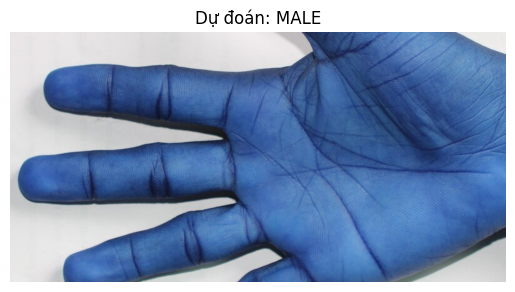

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
predict_palm('/content/sample_data/dataset-cover.JPG')
def predict_palm(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (img_size, img_size))
    img = img.astype('float32') / 255.0
    img = img.reshape(1, img_size, img_size, 1)  # đúng shape input

    prediction = model.predict(img)
    predicted_class = le.inverse_transform([np.argmax(prediction)])

    # Hiển thị ảnh và kết quả
    plt.imshow(cv2.imread(image_path), cmap='gray')
    plt.title(f"Dự đoán: {predicted_class[0]}")
    plt.axis('off')
    plt.show()




In [53]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


data_dir = "/kaggle/input/flowers-recognition/flowers"

X = []
y = []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (32, 32))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

print("Total image:", len(X))
print("Total label:", set(y))

# Encode nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
num_classes = y_categorical.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 32*32*3)
X_test = X_test.reshape(-1, 32*32*3)


Total image: 4317
Total label: {np.str_('tulip'), np.str_('daisy'), np.str_('dandelion'), np.str_('rose'), np.str_('sunflower')}


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,229 (3.13 MB)

 Trainable params: 820,229 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train,
          epochs=80,
          batch_size=42,
          validation_data=(X_test, y_test))

Epoch 1/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3323 - loss: 1.5795 - val_accuracy: 0.3819 - val_loss: 1.4109
Epoch 2/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4446 - loss: 1.2837 - val_accuracy: 0.4421 - val_loss: 1.2442
Epoch 3/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4963 - loss: 1.2050 - val_accuracy: 0.4537 - val_loss: 1.2841
Epoch 4/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5055 - loss: 1.1705 - val_accuracy: 0.4549 - val_loss: 1.2340
Epoch 5/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4942 - loss: 1.1978 - val_accuracy: 0.4479 - val_loss: 1.2829
Epoch 6/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5436 - loss: 1.1063 - val_accuracy: 0.4363 - val_loss: 1.3064
Epoch 7/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5687 - loss: 1.0483 - val_accuracy: 0.4630 - val_loss: 1.2529
Epoch 8/80
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5803 - loss: 1.0283 - val_accuracy: 0.4699 - v

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print('Test loss:', accuracy[0])
print('Test accuracy:', accuracy[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4552 - loss: 3.8239
Test loss: 3.8568694591522217
Test accuracy: 0.44212964177131653


Tiên đoán là: daisy


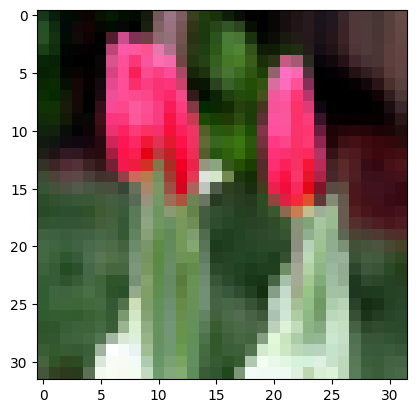

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('/content/sample_data/100930342_92e8746431_n.jpg').resize((32, 32))
plt.imshow(img)
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
img_array = img_array.reshape(1, 32, 32, 3)
predicted_class_index = np.argmax(prediction)
flower_name = le.inverse_transform([predicted_class_index])
print("Tiên đoán là:", flower_name[0])
